In [1]:
#@title *
from IPython.display import HTML, display
HTML('''
<div style="position: relative;">
    <div style="
        background-image: url(
          'https://images.unsplash.com/photo-1631653355789-3e32dcce22db?q=80&w=1964&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D'
          );
        background-size: cover;
        background-position: center;
        width: 100%;
        height: 300px;
        border-radius: 10px;
        margin: 20px 0;
        box-shadow: 0 4px 8px rgba(0,0,0,0.1);">
    </div>
    <div style="
        position: absolute;
        bottom: 20px;
        left: 20px;
        color: white;
        font-size: 24px;
        text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">
        Lung Ventilator System
    </div>
</div>
''')

Photo by [The Centers for Disease Control and Prevention](https://unsplash.com/@cdc) on Unsplash.

# **Ventilator Pressure Prediction 💨**

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla blandit dictum quam sit amet elementum. Vestibulum sed augue eu augue euismod ornare at lobortis nibh. Aenean hendrerit non dui a faucibus. In ut tincidunt orci. Nunc quis scelerisque diam. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Integer finibus lobortis nisi, venenatis sagittis ipsum cursus ac. Suspendisse nunc libero, bibendum a condimentum non, rhoncus vitae mauris. Vestibulum ullamcorper ligula tempor dui bibendum tempor. Donec blandit egestas lectus. Praesent finibus justo at dictum tempus. Nullam elementum sodales libero, semper tempus nisl pulvinar eu. Nunc eget ipsum arcu. Donec ullamcorper libero vel eleifend condimentum. Vivamus sit amet tincidunt mi. Integer malesuada augue a purus porttitor, ut semper odio pretium.

**Authors:**
- [Daniel Valdez](https://github.com/Danval-003)
- [Emilio Solano](https://github.com/emiliosolanoo21)
- [Adrian Flores](https://github.com/adrianRFlores)
- [Andrea Ramírez](https://github.com/Andrea-gt)

***

## **(i) Problem Statement and Analysis**

La ventilación mecánica se ha convertido en un procedimiento médico esencial que implica el uso de ventiladores para administrar oxígeno a pacientes sedados  a través de un tubo endotraqueal. Sin embargo, este proceso enfrenta importantes desafíos, como se evidenció durante los primeros días de la pandemia de COVID-19, principalmente debido a la necesidad de supervisión clínica intensiva. Además, el desarrollo de nuevos métodos para controlar estos ventiladores resulta prohibitivamente costoso, incluso antes de llegar a la fase de ensayos clínicos.

En respuesta a estos retos, Google Brain, en colaboración con la Universidad de Princeton, está liderando una iniciativa para revolucionar el campo de la ventilación mecánica mediante la aplicación de machine learning. Su enfoque busca superar las limitaciones de los simuladores actuales, que funcionan como un conjunto donde cada modelo simula una única configuración pulmonar. La propuesta  considera que los pulmones y sus atributos forman un espacio continuo, por lo que es necesario explorar un enfoque paramétrico que tenga en cuenta las diferencias entre los pulmones de los pacientes.

El objetivo principal de este proyecto es desarrollar sistemas más sofisticados que puedan generalizar mejor entre pulmones con características variables, superando las capacidades de los controladores PID que son el estándar actual en la industria. Este avance podría reducir significativamente las barreras económicas en el desarrollo de nuevos métodos de control de ventiladores mecánicos, facilitando la creación de algoritmos que se adapten a las necesidades específicas de cada paciente. En última instancia, esto podría resultar en un acceso más amplio a tratamientos de ventilación y una reducción significativa de la carga de trabajo para el personal clínico, tanto en situaciones de crisis como en la práctica médica cotidiana.

## **(1) Import Libraries** ⬇️

In [2]:
# ===== Standard Libraries =====
import os  # For operating system utilities
import warnings  # For warning management

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# ===== Data Manipulation and Analysis =====
import numpy as np  # For numerical computations
import pandas as pd  # For data manipulation and analysis
from sklearn.metrics import mean_absolute_error as mae  # For mean absolute error
from sklearn.preprocessing import RobustScaler, normalize  # For data preprocessing
from sklearn.model_selection import train_test_split, GroupKFold, KFold  # For data splitting

# ===== Visualization =====
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns  # For enhanced data visualization
from IPython.display import Image  # For displaying images in Jupyter Notebooks
from IPython.core.display import HTML  # For displaying HTML content
import base64  # For encoding/decoding binary data

# ===== Machine Learning and Deep Learning =====
import tensorflow as tf  # For deep learning models
from tensorflow import keras  # High-level neural networks API
from tensorflow.python.client import device_lib  # For device information

# ===== Neural Networks =====
from keras.models import Sequential  # For building neural networks
from keras.layers import Dense, Dropout, LSTM, BatchNormalization  # For building neural network layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint  # For early stopping and model checkpointing
import tensorflow.keras.backend as K  # Keras backend for TensorFlow operations
from tensorflow.keras.callbacks import Callback

# Set default figure size and style
plt.rcParams['figure.figsize'] = (6, 4)  # Default figure size
plt.rcParams['agg.path.chunksize'] = 10000
sns.set(style="whitegrid")  # Seaborn style for plots

# Define custom color palette
palette = sns.color_palette("viridis", 12)

# Enable inline plotting for Jupyter Notebooks
%matplotlib inline

# ===== File Handling =====
from google.colab import files  # For file upload and download in Colab

# ===== Progress Tracking =====
from tqdm.notebook import tqdm

# Set a fixed seed for reproducibility
random_state = 42
np.random.seed(random_state)  # Seed for NumPy random functions
tf.random.set_seed(random_state)  # Seed for TensorFlow random functions

In [3]:
 #%pip install kaggle

In [4]:
#!pip install keras-tuner

In [5]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
# Check if GPUs are available
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Set memory growth for GPUs (optional but useful to avoid out-of-memory errors)
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)

TPU configurada correctamente.


In [ ]:
# Configuration for TPU in Google Colab
try:
    # Connect to the TPU
    resolver = tf.distribute.cluster_resolver.TPUClusterResolver()  # No need for the .connect() method
    tf.config.experimental_connect_to_cluster(resolver)
    tf.tpu.experimental.initialize_tpu_system(resolver)
    strategy = tf.distribute.TPUStrategy(resolver)  # Define the TPU strategy
    print("TPU successfully configured.")
    
except ValueError:
    print("TPU not found.")

## **(2) Data Upload** 📄

In [7]:
# The following code is adapted from the notebook titled "Feature Engineering for LSTM - Score: 0.1878" by Kartik Khandelwal
# on Kaggle.

def reduce_memory_usage(df):
    """
    Reduces the memory usage of a DataFrame by downcasting numerical columns to more efficient types
    and converting object columns to categorical types if possible. This can be especially useful
    for large DataFrames to save memory and optimize performance.

    Parameters
    ----------
    df : pandas.DataFrame
        The input DataFrame for which memory usage optimization will be performed.

    Returns
    -------
    pandas.DataFrame
        The optimized DataFrame with reduced memory usage.

    Notes
    -----
    - Integer columns are downcasted to the smallest possible integer subtype that can
      accommodate their min and max values (int8, int16, int32, or int64).
    - Floating-point columns are downcasted to the smallest suitable float subtype
      (float16, float32, or float64).
    - Object columns (typically used for categorical data) are converted to the 'category'
      data type, which can significantly reduce memory usage when there are repeated values.

    Examples
    --------
    >>> df = pd.DataFrame({
    ...     'A': [1, 2, 3, 4],
    ...     'B': [10.5, 20.1, 30.2, 40.6],
    ...     'C': ['foo', 'bar', 'baz', 'qux']
    ... })
    >>> df_optimized = reduce_memory_usage(df)

    This will downcast the integer and float columns to smaller types where applicable,
    and convert the object column to categorical type if beneficial.

    """

    # Calculate initial memory usage of the DataFrame
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    # Iterate over all columns and apply type optimization
    for col in df.columns:
        col_type = df[col].dtype

        # Process only numerical columns (skip object columns for now)
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()

            # Handle integer columns
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)

            # Handle floating-point columns
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

        # Convert object columns to 'category' type if beneficial
        else:
            df[col] = df[col].astype('category')

    # Calculate final memory usage and report the savings
    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

### **(1) Downloading Datasets from Kaggle**

In [8]:
# Upload files from the local system to the Colab environment
uploaded = files.upload()

# Iterate over the files uploaded by the user
for fn in uploaded.keys():
    # Print information about each uploaded file, including its name and size in bytes
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))

# Create the directory ~/.kaggle if it does not exist. This directory is where Kaggle API expects configuration files.
!mkdir -p ~/.kaggle/

# Move the uploaded kaggle.json file into the ~/.kaggle/ directory. This file contains API credentials for Kaggle.
!mv kaggle.json ~/.kaggle/

# Set the permissions of kaggle.json to be readable only by the owner. This is necessary for security reasons.
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 74 bytes


In [9]:
#!kaggle competitions download -c ventilator-pressure-prediction

In [10]:
 #!unzip /content/ventilator-pressure-prediction.zip

### **(2) Loading the Training Dataset**

In [11]:
# Load the training dataset into a DataFrame
df = pd.read_csv('train.csv')  # Read the CSV file 'train.csv' as a DataFrame

# Display the first five rows of the DataFrame
df.head()  # Preview the top entries to understand the data structure

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [12]:
df = reduce_memory_usage(df)

Memory usage of dataframe is 368.41 MB
Memory usage after optimization is: 97.86 MB
Decreased by 73.4%


## **(3) Exploratory Data Analysis 🔎**

Los datos empleados en la competencia se obtuvieron mediante un ventilador de código abierto modificado, conectado a un pulmón artificial de fuelle a través de un circuito respiratorio. El sistema incorpora dos variables de control fundamentales: la primera es una variable continua que oscila entre 0 y 100, representando el porcentaje de apertura de la válvula solenoide inspiratoria que permite la entrada de aire al pulmón (donde **0 indica un cierre completo** sin entrada de aire, y **100 una apertura total**). La segunda variable es binaria y controla la válvula exploratoria, indicando si está **abierta (1) o cerrada (0)** para permitir la salida del aire.

En este contexto, se reciben múltiples series temporales de respiraciones y se debe de desarrollar modelos para predecir la presión de la vía aérea en el circuito respiratorio durante la respiración, basándose en las series temporales de las variables de control mencionadas antes.

### **(1) Dataset Overview and Description**

In [13]:
# Print the number of records in the DataFrame
print("The given dataset has {:,} records and {:,} columns.".format(df.shape[0], df.shape[1]))

The given dataset has 6,036,000 records and 8 columns.


**Observaciones 💡 -->**
> - El conjunto de datos `train.csv`, con el que se está trabajando cuenta con 6,036,000 registros y 8 columnas, lo que indica que se trata de un conjunto de datos con una dimensión relativamente grande y  moderadamente detallado.

> - Cada serie temporal representa una respiración de aproximadamente 3 segundos. Cada fila es un paso de tiempo en una respiración y proporciona las dos señales de control, la presión resultante en las vías respiratorias y los atributos relevantes del pulmón.

> - Nótese que cada ciclo de respiración (`breath_id`) se registra en múltiples intervalos de tiempo, proporcionando mediciones continuas de `u_in`, `u_out` y `pressure`.

**Fuente:** [Página oficial de Kaggle](https://www.kaggle.com/competitions/ventilator-pressure-prediction/overview)

In [14]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6036000 entries, 0 to 6035999
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         int32  
 1   breath_id  int32  
 2   R          int8   
 3   C          int8   
 4   time_step  float16
 5   u_in       float16
 6   u_out      int8   
 7   pressure   float16
dtypes: float16(3), int32(2), int8(3)
memory usage: 97.9 MB


**Observaciones 💡 -->**

Como se puede observar en la pequeña tabla colocada anteriormente, se cuenta con las siguietes columnas en el conjunto de datos:
Aquí tienes una lista explicando las columnas del conjunto de datos de manera sencilla:

> - **id**: Identificador único para cada paso de tiempo en todo el archivo.

> - **breath_id**: Identificador único para cada ciclo de respiración.

> - **R**: Este valor indica cuán restringido está el paso del aire por las vías respiratorias, medido en cmH2O por litro por segundo. Es como la resistencia que sientes al tratar de inflar un globo a través de una pajilla: una pajilla más estrecha (alto R) hará que sea más difícil inflar el globo, mientras que una más ancha (bajo R) lo hará más fácil.

> - **C**: Este valor indica cuán flexible es el pulmón, medido en mililitros por cmH2O. Representa el cambio en el volumen de aire por cada cambio en la presión. Siguiendo con el ejemplo del globo, un globo más delgado (alto C) se inflará más fácilmente que uno más grueso (bajo C).

> - **time_step**: Este es el instante exacto en el que se realizó cada medición.

> - **u_in**: Este es el control para una válvula que permite la entrada de aire (inspiración) al pulmón. Sus valores varían entre 0 y 100, donde 0 significa que no se está permitiendo la entrada de aire y 100 significa que se está permitiendo la entrada máxima.

> - **u_out**: Este es el control para una válvula que permite la salida de aire (espiración) del pulmón. Puede tener un valor de 0 (sin salida de aire) o 1 (salida de aire permitida).

> - **pressure**: Este valor mide la presión en las vías respiratorias del circuito respiratorio, expresado en cmH2O. Indica cuánta presión se está ejerciendo en el aire dentro de las vías respiratorias durante la respiración.

### **(2) Variable Classification and Description**

| **Nombre**       | **Descripción**                         | **Tipo de Variable**         |
|------------------|-----------------------------------------|------------------------------|
| id               | Identificador único                     | Cualitativa (Nominal)        |
| breath_id        | Identificador de ciclo de respiración   | Cualitativa (Nominal)        |
| R                | Resistencia de las vías respiratorias   | Cuantitativa (Continua)      |
| C                | Cumplimiento del pulmón                 | Cuantitativa (Continua)      |
| time_step        | Marca de tiempo de cada medición        | Cuantitativa (Continua)      |
| u_in             | Entrada de aire en la válvula           | Cuantitativa (Discreta)      |
| u_out            | Salida de aire en la válvula            | Cualitativa (Nominal)        |
| pressure         | Presión en las vías respiratorias       | Cuantitativa (Continua)      |


**Observaciones 💡 -->**
> - Se observa que el conjunto de datos incluye tres variables cualitativas, todas de tipo nominal, y cinco variables cuantitativas que se distribuyen entre continuas y discretas.

### **(3) Preliminary Data Exploration and Cleaning**

#### **(1) Data Preprocessing and Preparation**

##### **(1) Removing Irrelevant Features**

In [15]:
# Drop the 'id' column from the DataFrame 'df'
# The 'inplace=True' parameter means the operation will modify the original DataFrame directly
df.drop(columns=['id'], inplace=True)

**Observaciones 💡 -->**
> - Se procede a la eliminación de la columna `id`. Dado que cada registro corresponde a una observación única, esta columna no aporta información relevante o significativa para el modelo o análisis. Al eliminarla, se reduce la dimensionalidad, lo que puede mejorar la eficiencia del algoritmo y simplificar la interpretación posterior de este.

In [16]:
# Generate basic descriptive statistics for the features in the training DataFrame
# Display the styled DataFrame with basic statistics
df.describe()

,breath_id,R,C,time_step,u_in,u_out,pressure
count,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06,6.036000e+06
mean,6.283886e+04,2.703618e+01,2.608072e+01,NaN,NaN,6.204493e-01,NaN
std,3.633526e+04,1.959549e+01,1.715231e+01,0.000000e+00,0.000000e+00,4.852752e-01,0.000000e+00
min,1.000000e+00,5.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-1.895508e+00
25%,3.137700e+04,5.000000e+00,1.000000e+01,6.430664e-01,3.935547e-01,0.000000e+00,6.328125e+00
50%,6.276550e+04,2.000000e+01,2.000000e+01,1.308594e+00,4.386719e+00,1.000000e+00,7.031250e+00
75%,9.430100e+04,5.000000e+01,5.000000e+01,1.965820e+00,4.984375e+00,1.000000e+00,1.364062e+01
max,1.257490e+05,5.000000e+01,5.000000e+01,2.937500e+00,1.000000e+02,1.000000e+00,6.481250e+01


**Observaciones 💡 -->**
> - Se observa una amplia variabilidad en las características pulmonares, con valores medios de restricción pulmonar de 27.04 y flexibilidad de 26.08, con desviaciones estándar de 19.59 y 17.15 respectivamente.

> - Los cuartiles muestran que el 25% de los registros presenta características pulmonares moderadamente flexibles. Por otro lado el 50% (mediana) de R es 20.0 y C es 20.0, lo que sugiere que la mayoría de los pulmones se agrupan en un rango intermedio.

> - Parece ser que la respiración más larga dura poco menos de 3 segundos.

##### **(2) Handling Missing Values**

In [17]:
df.isnull().sum()

,0
breath_id,0
R,0
C,0
time_step,0
u_in,0
u_out,0
pressure,0


**Observaciones 💡 -->**
> - Como se observa en el muy breve análisis previo, el conjunto de datos está completamente poblado, lo que implica que no es necesaria ninguna forma de imputación para el manejo de datos faltantes.

##### **(3) Handling Duplicated Values**

In [18]:
# Get duplicated rows
duplicates = df[df.duplicated(keep=False)]
duplicates

,breath_id,R,C,time_step,u_in,u_out,pressure


**Observaciones 💡 -->**  

> - Nótese que el conjunto de datos tampoco presenta valores duplicados.

#### **(2) Data Visualization and Distribution Analysis**

In [19]:
def plot_column(df, column):
    """
    Generates a fancy histogram and boxplot for a specified column in the DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - column (str): The column name for which to generate the plots.
    """
    # Set up the figure and aesthetic style
    sns.set(style="whitegrid", palette=palette)
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), gridspec_kw={'width_ratios': [2, 1]})
    fig.suptitle(f'Distribution and Spread of {column}', fontsize=16, fontweight='bold')

    # Define colors
    main_color = palette[0]
    accent_color = palette[6]

    # Histogram with KDE
    sns.histplot(df[column], kde=True, color=main_color, edgecolor='black', ax=axes[0], bins=20)
    axes[0].axvline(df[column].mean(), color=accent_color, linestyle='--', label='Mean')
    axes[0].axvline(df[column].median(), color='purple', linestyle=':', label='Median')
    axes[0].legend()
    axes[0].set_title(f'Histogram of {column}', fontsize=14, fontweight='semibold')
    axes[0].set_xlabel(column, fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)

    # Boxplot with additional details
    sns.boxplot(x=df[column], color=main_color, width=0.6, ax=axes[1])
    mean_val = df[column].mean()
    median_val = df[column].median()
    axes[1].axvline(mean_val, color=accent_color, linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[1].axvline(median_val, color='purple', linestyle=':', label=f'Median: {median_val:.2f}')
    axes[1].legend()
    axes[1].set_title(f'Boxplot of {column}', fontsize=14, fontweight='semibold')
    axes[1].set_xlabel(column, fontsize=12)

    # Final layout adjustments
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leaves space for the main title
    plt.show()

In [20]:
def plot_frequency(df, column):
    """
    Generates a frequency plot (bar plot) for a specified column in the DataFrame.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - column (str): The column name for which to generate the frequency plot.
    """
    # Set plot style
    sns.set(style="whitegrid")

    # Create the frequency plot
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=column, palette=palette)

    # Add titles and labels
    plt.title(f'Frequency Plot of {column}', fontsize=14, fontweight='bold')
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Show the plot
    plt.show()

##### **(1) Distribution Analysis of Column `R`**

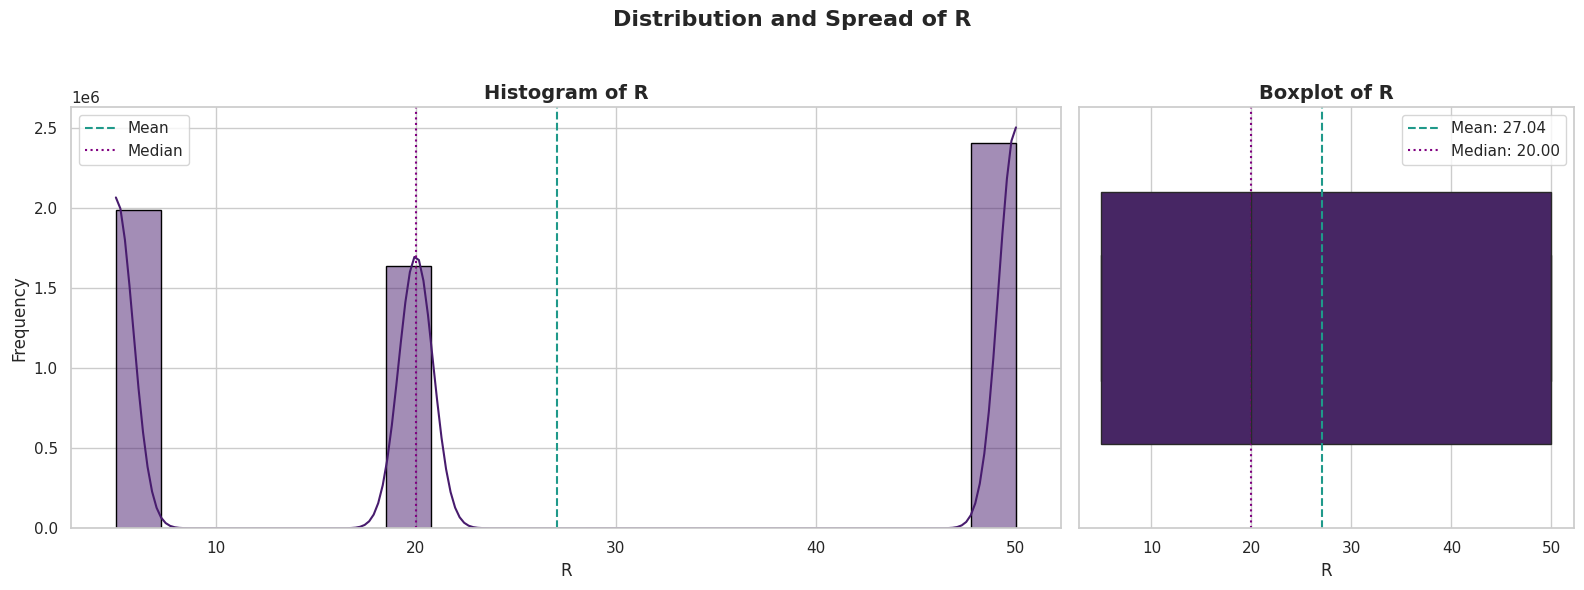

In [21]:
plot_column(df, 'R')  # Generate and display a histogram and boxplot for the column 'R' in the DataFrame 'df'

**Observaciones 💡 -->**  

> - Se observa que esta variable ha sido clasificada incorrectamente como numérica en el conjunto de datos, dado que únicamente contiene valores de 5, 20 o 50, lo que indica una naturaleza más categórica que cuantitativa. Debido a esto, resulta necesario transformar los valores a tipo string.

In [22]:
# Convert 'R' to strings.
df['R'] = df['R'].astype(str)

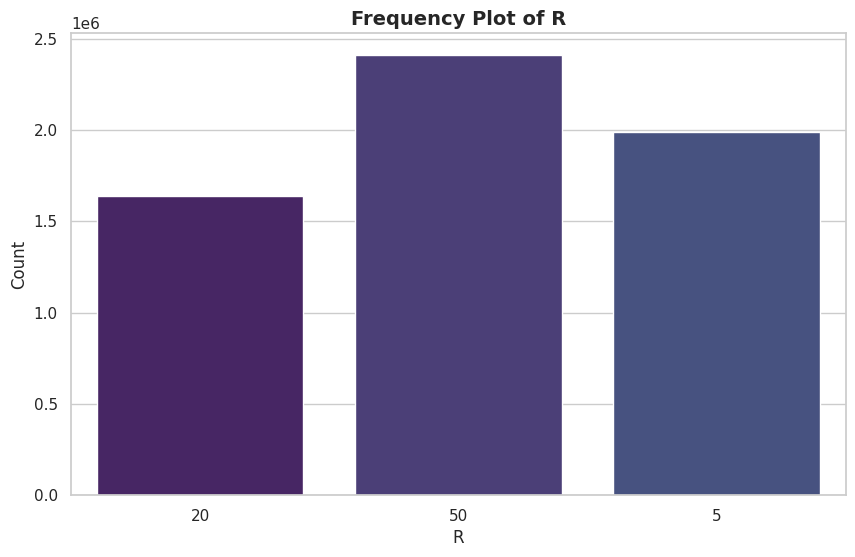

In [23]:
plot_frequency(df, 'R') # Plot frecuency of values in column `R`

##### **(2) Distribution Analysis of Column `C`**

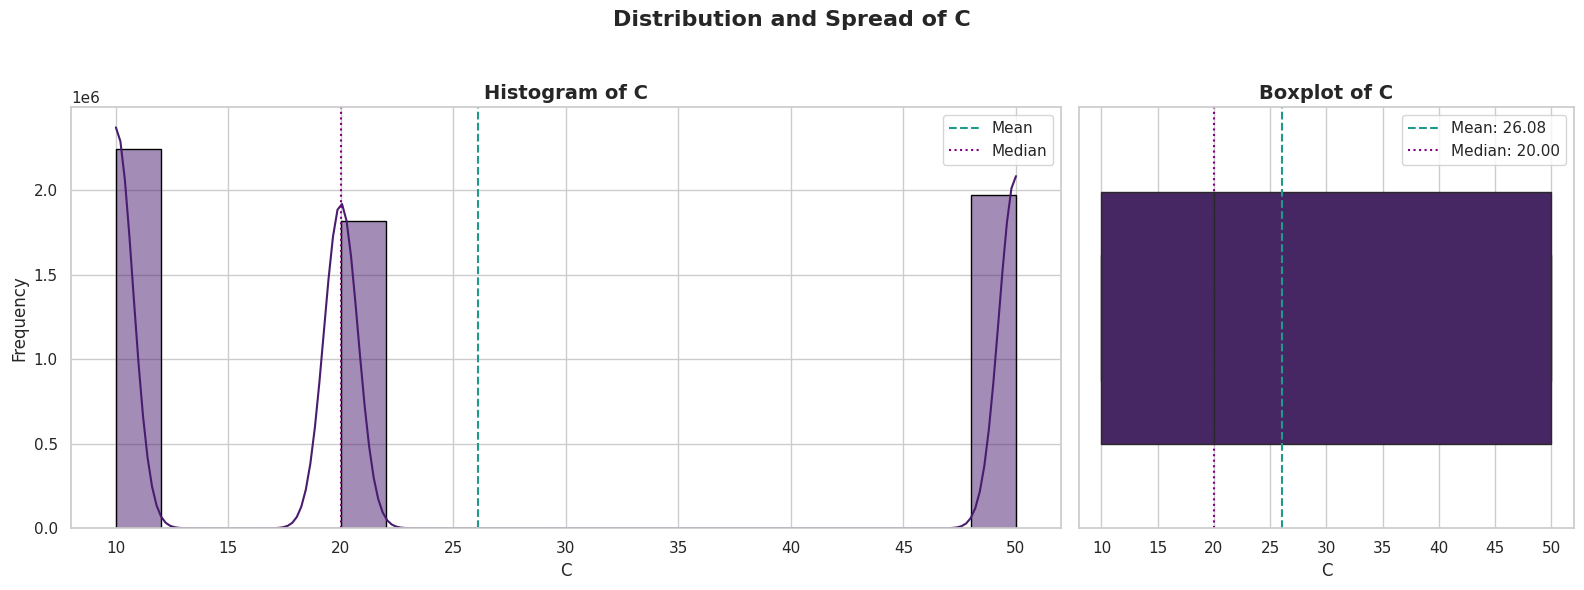

In [24]:
plot_column(df, 'C')  # Generate and display a histogram and boxplot for the column 'C' in the DataFrame 'df'

**Observaciones 💡 -->**  

> - De manera similar al caso previamente descrito, la variable `C` presenta una naturaleza categórica, ya que sus valores se limitan a 50, 20 o 10. Estos valores indican categorías discretas en lugar de representar una magnitud numérica continua. Por lo tanto, es aconsejable convertir los valores de esta variable a formato `string` nuevamente.

In [25]:
# Convert 'R' to strings.
df['C'] = df['C'].astype(str)

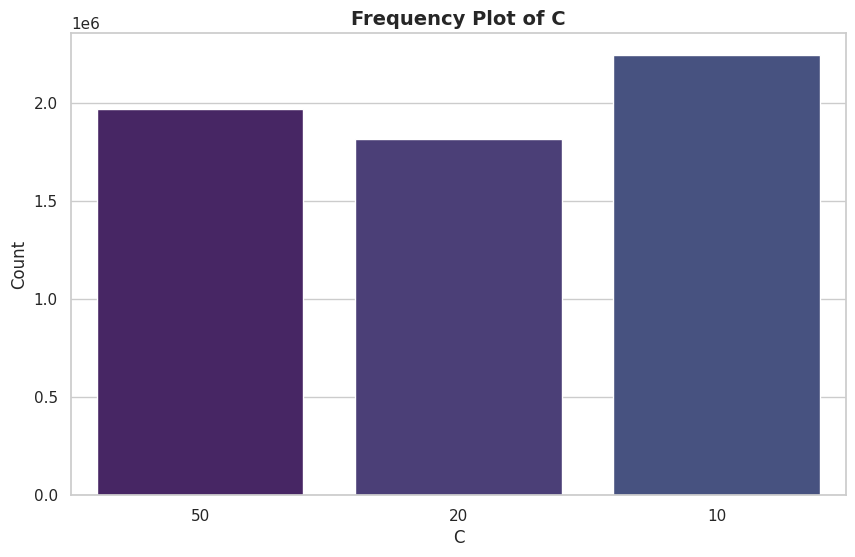

In [26]:
plot_frequency(df, 'C') # Plot frecuency of values in column `C`

##### **(3) Distribution Analysis of Column `time_step`**

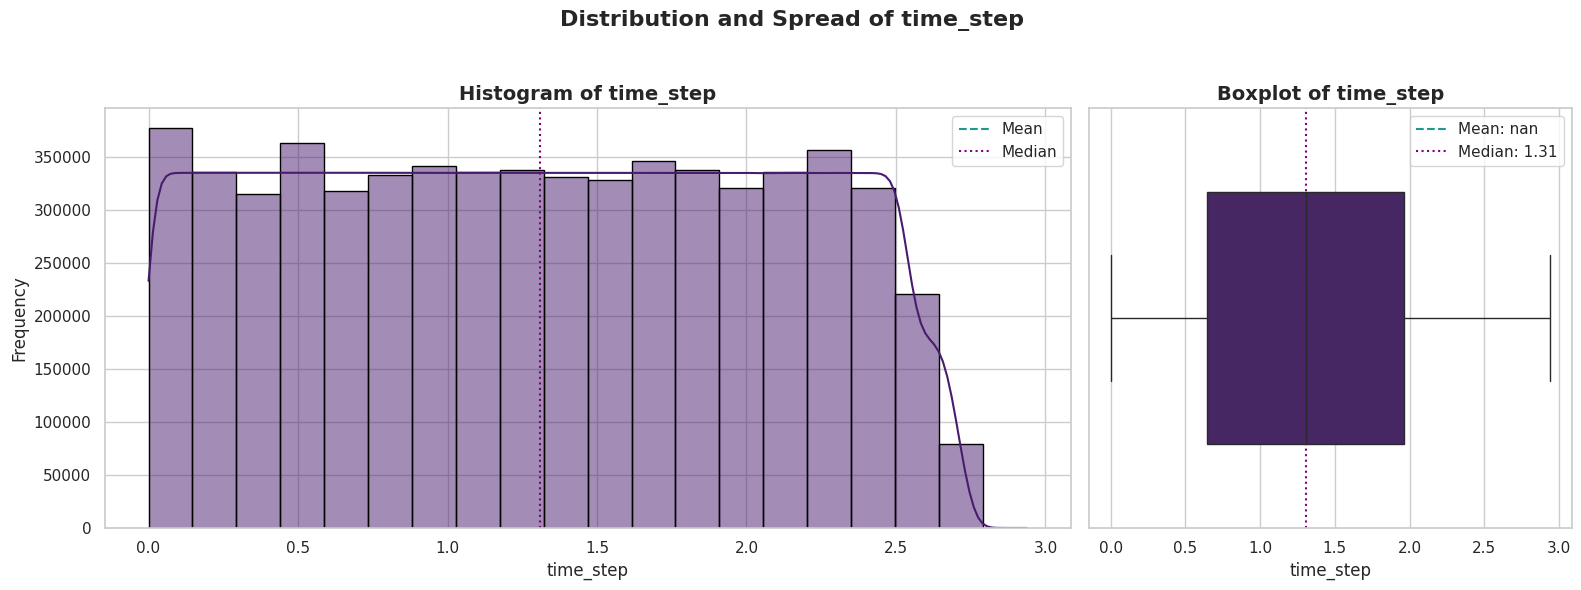

In [27]:
plot_column(df, 'time_step')  # Generate and display a histogram and boxplot for the column 'time_step' in the DataFrame 'df'

**Observaciones 💡 -->**  

> - La variable `time_step` presenta una distribución uniforme en el intervalo de 0 a 3, con una media y mediana centradas en aproximadamente 1.31. La ausencia de valores atípicos y la simetría de la distribución indican que time_step es una variable homogénea en este conjunto de datos, y probablemente bien normalizada o generada aleatoriamente en este rango.

> - No se observan puntos fuera de los extremos de los bigotes, lo que indica que no hay valores atípicos.

##### **(4) Distribution Analysis of Column `u_in`**

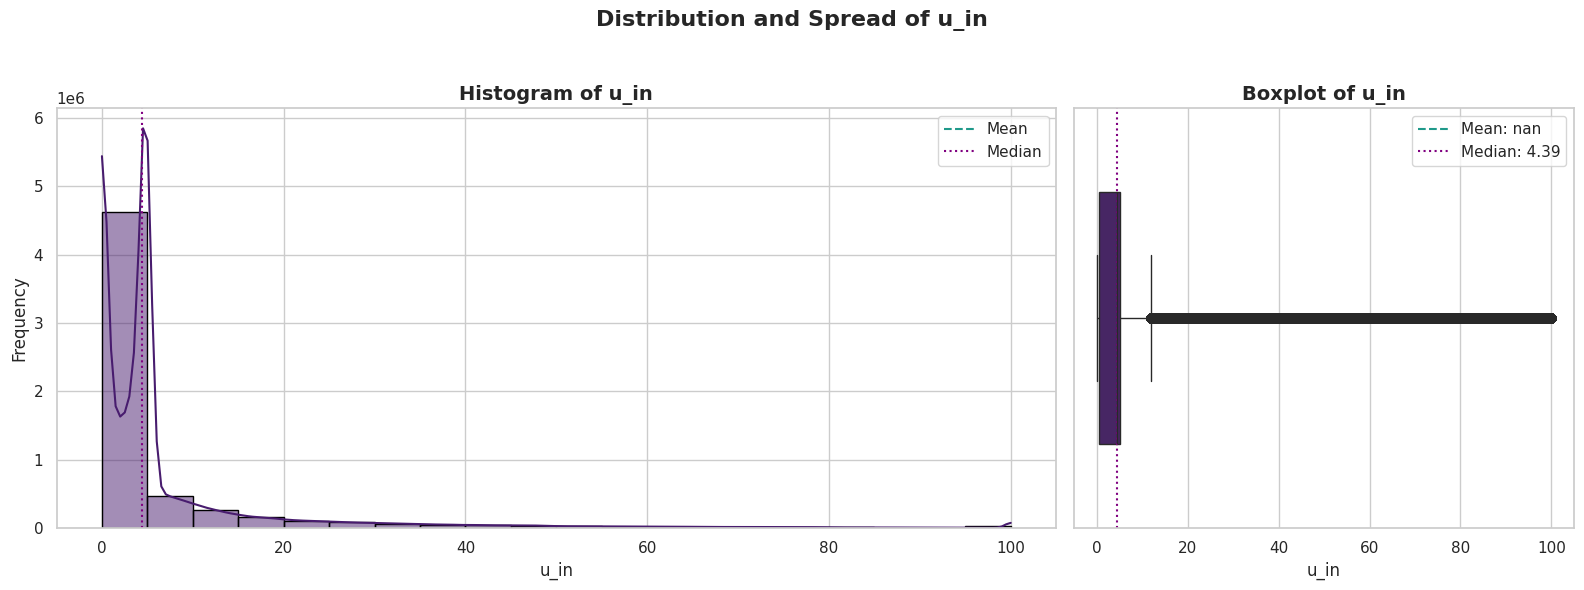

In [28]:
plot_column(df, 'u_in')  # Generate and display a histogram and boxplot for the column 'u_in' in the DataFrame 'df'

**Observaciones 💡 -->**  

> - En los gráficos presentados se observa la presencia de varios puntos atípicos, que se desvían significativamente del patrón general de los datos. La mayoría de los registros se agrupan en un rango de valores comprendido entre 0 y 4 aproximadamente, lo que indica una concentración de observaciones dentro de este intervalo.

##### **(5) Distribution Analysis of Column `u_out`**

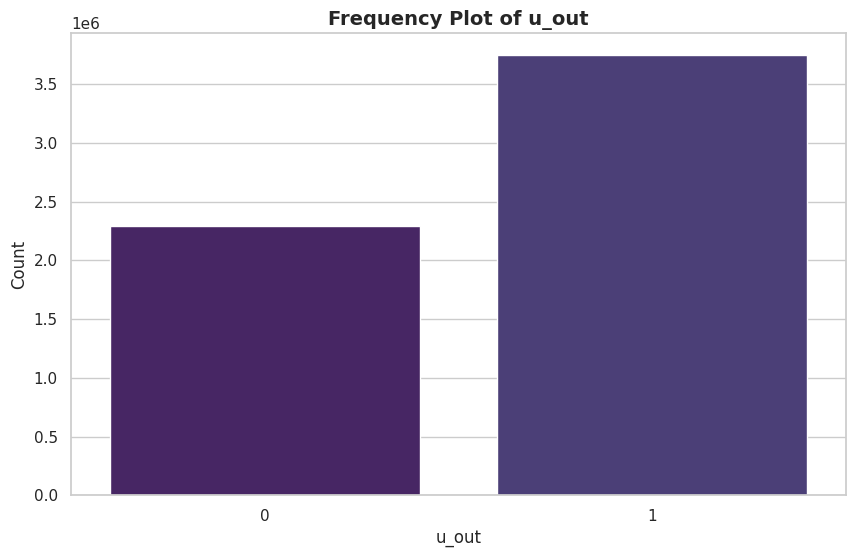

In [29]:
plot_frequency(df, 'u_out') # Plot frecuency of values in column `u_out`

**Observaciones 💡 -->**  

> - En el análisis de la columna `u_out`, se observa que predomina el valor "1", que corresponde a la etiqueta que indica "salida de aire permitida". Se observa en general un fuerte desbalance en la distribución de las categorías dentro de la variable.

##### **(6) Distribution Analysis of Column `pressure` (Target)**

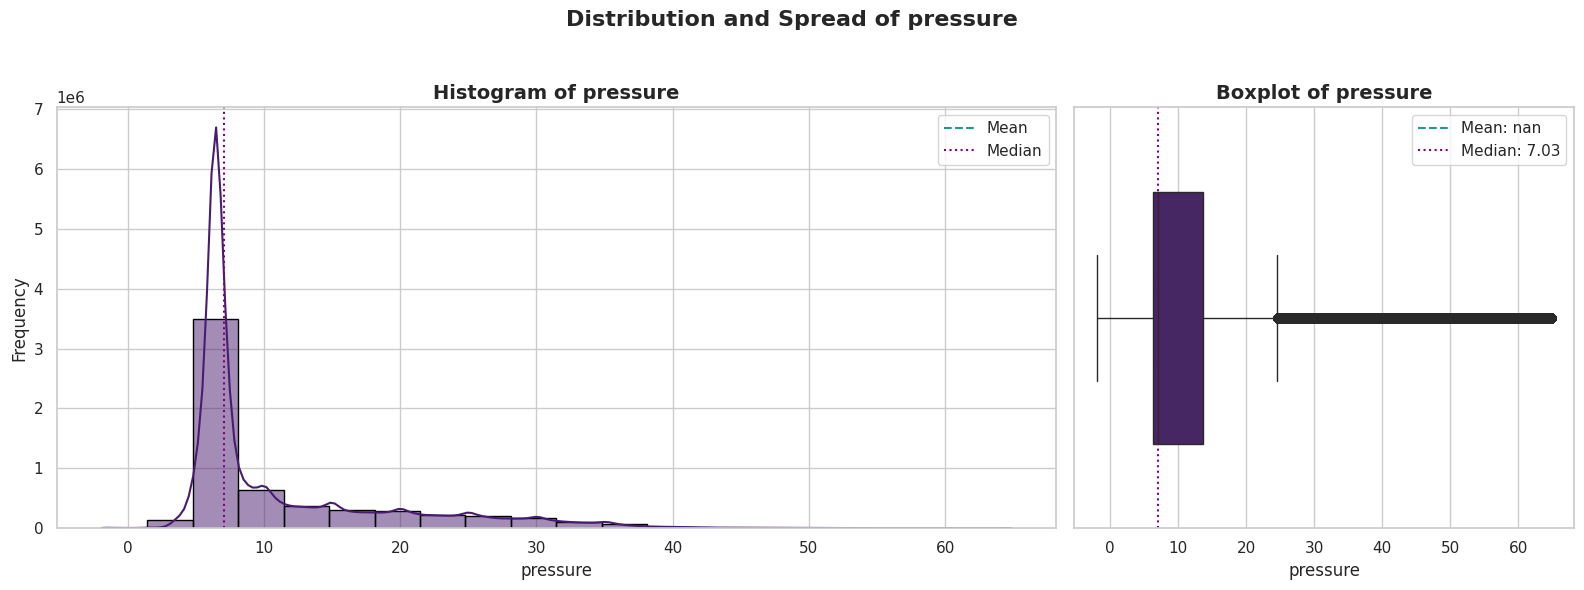

In [30]:
plot_column(df, 'pressure')  # Generate and display a histogram and boxplot for the column 'pressure' in the DataFrame 'df'

**Observaciones 💡 -->**

> - En los gráficos presentados se observa la presencia de varios puntos atípicos, que se desvían significativamente del patrón general de los datos. La mayoría de los registros se agrupan en un rango de valores comprendido entre 0 y 10 aproximadamente, lo que indica una concentración de observaciones dentro de este intervalo.

##### **(7) Time Series Analysis**

In [31]:
def tseries_by_breath(df, variable, breath_id=None):
    """
    Plots a time series for the given variable, optionally filtering by breath_id.

    Parameters:
    - df: DataFrame containing the data
    - variable: The variable name to plot (e.g., 'pressure', 'R', 'C', 'u_in', 'u_out')
    - breath_id: Optional; The breath_id to filter by. If None, all data is used.
    """
    # Check if the variable exists in the DataFrame
    if variable not in df.columns:
        print(f"Error: '{variable}' not found in DataFrame")
        return

    # If breath_id is specified, filter the DataFrame
    if breath_id is not None:
        df = df[df['breath_id'] == breath_id]

    # Check if filtered DataFrame is empty
    if df.empty:
        print(f"No data found for breath_id = {breath_id}" if breath_id else "No data found for the specified variable")
        return

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(df['time_step'], df[variable], label=variable, color=palette[0])
    plt.xlabel('Time Step')
    plt.ylabel(variable)
    plt.title(f'Time Series of `{variable}`' + (f' for breath_id = {breath_id}' if breath_id else ''), fontsize=14, fontweight='semibold')
    plt.legend(loc='upper right')
    plt.grid(True)

    # Show the plot
    plt.show()

###### **(1) Time Series Analysis Based on `pressure` Column**

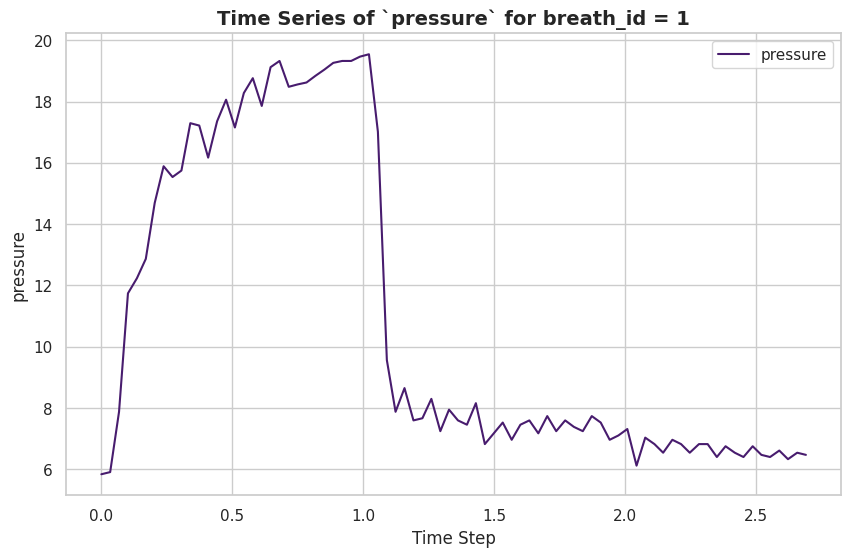

In [32]:
# To plot 'pressure'
tseries_by_breath(df, 'pressure', 1)

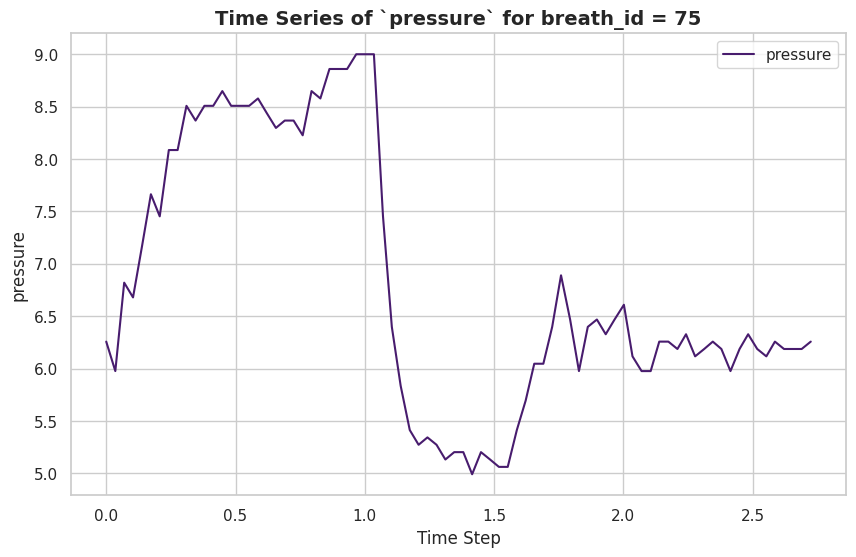

In [33]:
# To plot 'pressure'
tseries_by_breath(df, 'pressure', 75)

**Observaciones 💡 -->**

> - A partir del análisis de este gráfico, se puede inferir que, en general, durante el primer segundo, el valor de presión administrada es moderadamente alta elevada. Posteriormente, en los segundos siguientes, la cantidad de presión se reduce gradual y significativamente.

###### **(2) Time Series Analysis Based on `u_in` Column**

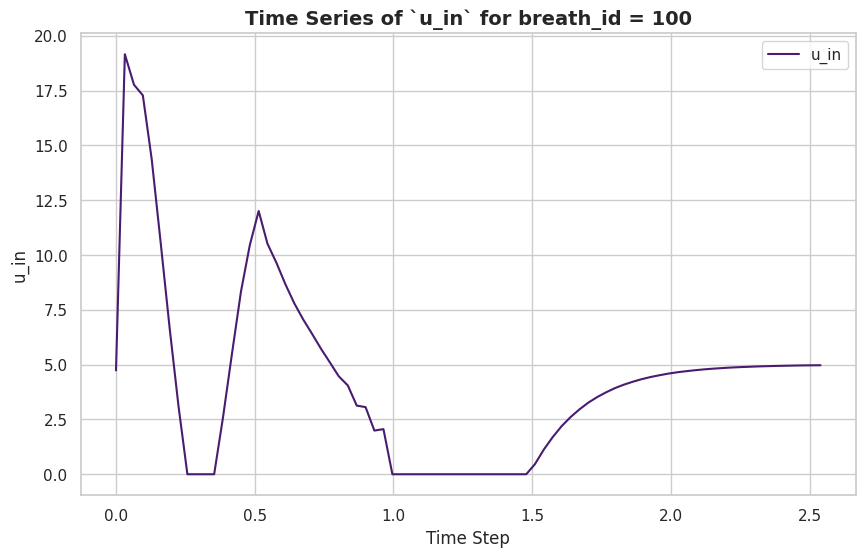

In [34]:
# To plot 'u_in'
tseries_by_breath(df, 'u_in', 100)

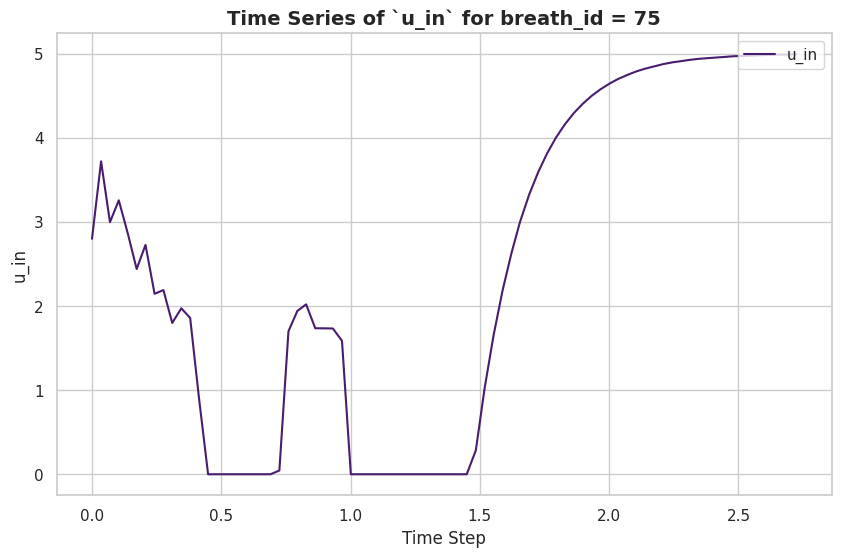

In [35]:
# To plot 'u_in'
tseries_by_breath(df, 'u_in', 75)

**Observaciones 💡 -->**

> - A partir del análisis de este gráfico, se puede inferir que, en general, durante los primeros segundos, la válvula facilita la entrada de aire al pulmón en una cantidad moderadamente elevada. Posteriormente, en los segundos siguientes, la cantidad de aire se reduce gradualmente hasta llegar a un cierre, momento en el cual el proceso se reinicia.


###### **(3) Time Series Analysis Based on `u_out` Column**

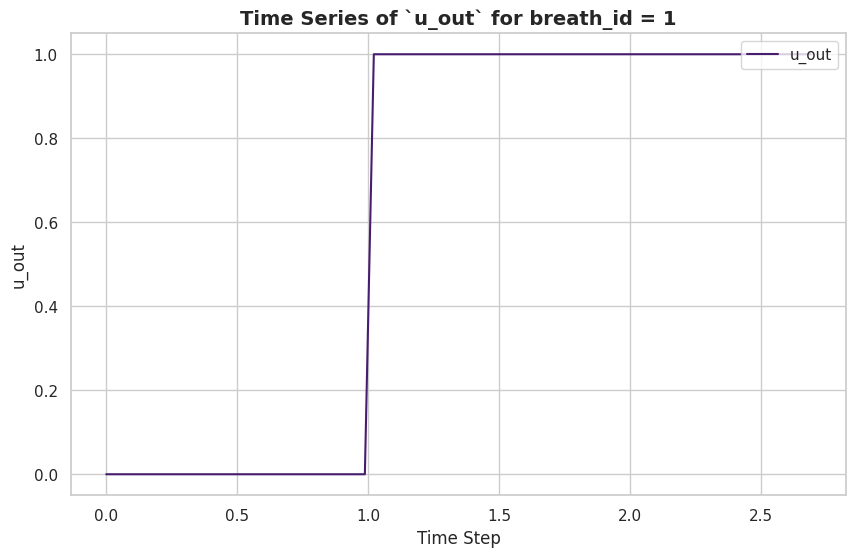

In [36]:
# To plot 'u_out'
tseries_by_breath(df, 'u_out', 1)

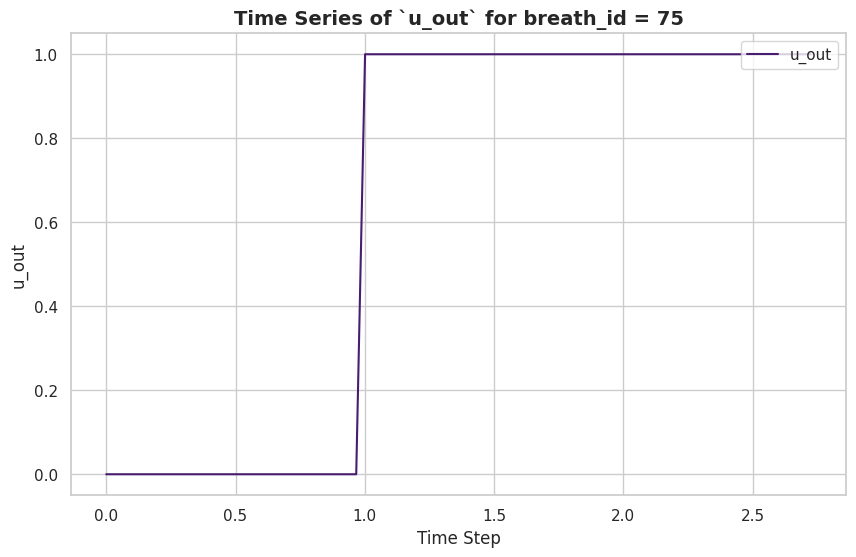

In [37]:
# To plot 'u_out'
tseries_by_breath(df, 'u_out', 75)

**Observaciones 💡 -->**

> - Cabe señalar que, en general, la válvula parece ser activada después de aproximadamente 1 segundo.

##### **(8) Unique Breath ID Count**

In [38]:
# Get the unique breath_id values
unique_breath = df['breath_id'].nunique()

# Print the result with separators
print(f'Unique breath_id values: {unique_breath:,}')

Unique breath_id values: 75,450


In [39]:
# Print the counts per unique breath_id directly
print("\nCounts per unique breath_id value:")
print(df['breath_id'].value_counts())


Counts per unique breath_id value:
breath_id
125749    80
1         80
2         80
3         80
4         80
          ..
35        80
36        80
37        80
39        80
40        80
Name: count, Length: 75450, dtype: int64


**Observaciones 💡 -->**

> - Lo anterior sugiere que cada secuencia de respiración se recopila de manera consistente durante 80 pasos de tiempo. Esto implica que el conjunto de datos captura medidas respiratorias en intervalores regulares para cada respiración.

> - Basado en la uniformidad de los datos de la serie temporal, es posible aplicar características de `lag` o estadísticas móviles.

<div class="alert alert-block alert-info">
<b>Nota:</b> El término "lag" se refiere al retraso entre un punto de datos observado y sus valores anteriores. Específicamente, es la diferencia de tiempo entre dos observaciones en una secuencia, o el número de pasos atrás en el tiempo que una observación pasada se encuentra respecto al tiempo actual.
</div>

##### **(9) Correlation Matrix (Heatmap)**

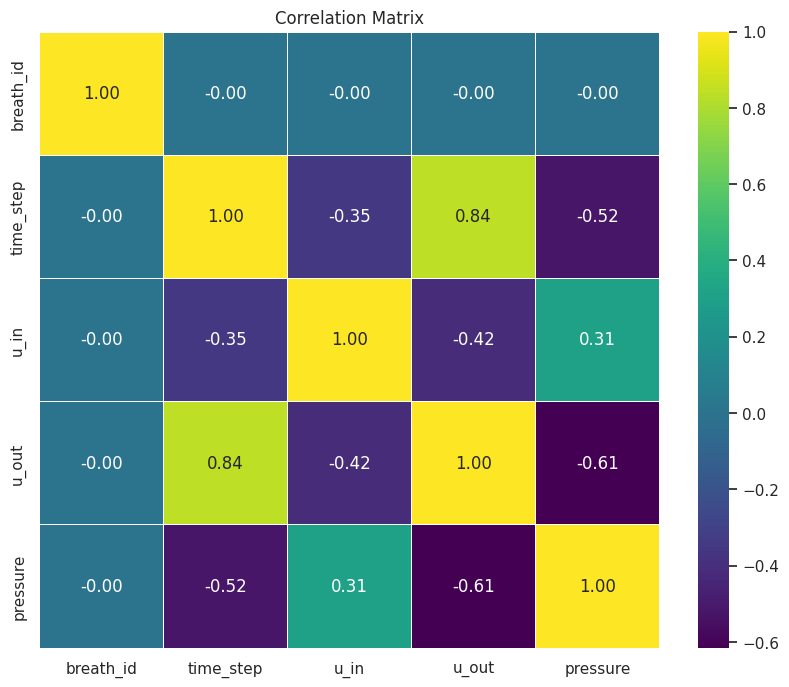

In [40]:
# Calculate the correlation matrix for numeric columns in the dataframe
correlation_matrix = df.select_dtypes(include=['number']).corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)

# Set the title
plt.title("Correlation Matrix")

# Show the plot
plt.show()

**Observaciones 💡 -->**

> - Como se puede observar, las variables `u_out` y `time_step` muestran una relación significativa con la variable respuesta `pressure`, presentando ambas un coeficiente de correlación superior a -0.50.

> - Este valor sugiere una correlación negativa moderada, lo que implica que a medida que las variables `u_out` y `time_step` varían, se produce una disminución en los valores de `pressure`.

> - Por otro lado, la relación más elevada que se puede observar es la de la variable `time_step` con `u_out` teniendo más de un 0.80 de coeficiente de correlación entre sí.

## **(4) Feature Engineering ⚙️**

### **(1) Creation of Additional Features**

In [41]:
def add_features(df):
    df['R'] = df['R'].astype(int) # Temporal
    df['C'] = df['C'].astype(int)

    # Cumulative sum of u_in (control input) for each breath
    df['u_in_cumsum'] = df.groupby('breath_id')['u_in'].cumsum()

    # Calculate a new feature: 'area' as time_step * u_in (cumulative)
    df['area'] = df['time_step'] * df['u_in']
    df['area_cumsum'] = df.groupby('breath_id')['area'].cumsum()

    # Lag features for u_in, pressure, R, C
    for col in ['u_in', 'pressure', 'R', 'C']:
        for lag in range(1, 4):  # Creating 1st, 2nd, and 3rd lag features
            df[f'{col}_lag{lag}'] = df.groupby('breath_id')[col].shift(lag)

    # Difference features: diff1, diff2, diff3, diff4
    for col in ['time_step', 'u_in', 'pressure', 'R', 'C']:
        for i in range(1, 5):  # Create up to 4 differences
            df[f'{col}_diff{i}'] = df.groupby('breath_id')[col].diff(i)

    # Rolling statistics (mean and standard deviation) over the last 3 time steps for selected variables
    for col in ['u_in', 'pressure', 'R', 'C']:
        df[f'{col}_rolling_mean'] = df.groupby('breath_id')[col].rolling(window=3, min_periods=1).mean().reset_index(level=0, drop=True)
        df[f'{col}_rolling_std'] = df.groupby('breath_id')[col].rolling(window=3, min_periods=1).std().reset_index(level=0, drop=True)

    return df

In [42]:
# Apply feature engineering
df = add_features(df)

In [43]:
# Check the new features
df.head()

,breath_id,R,C,time_step,u_in,u_out,pressure,u_in_cumsum,area,area_cumsum,...,C_diff3,C_diff4,u_in_rolling_mean,u_in_rolling_std,pressure_rolling_mean,pressure_rolling_std,R_rolling_mean,R_rolling_std,C_rolling_mean,C_rolling_std
0,1,20,50,0.000000,0.083313,0,5.835938,0.083313,0.000000,0.000000,...,NaN,NaN,0.083313,NaN,5.835938,NaN,20.0,NaN,50.0,NaN
1,1,20,50,0.033661,18.390625,0,5.906250,18.473938,0.619141,0.619141,...,NaN,NaN,9.236969,12.945224,5.871094,0.049718,20.0,0.0,50.0,0.0
2,1,20,50,0.067505,22.515625,0,7.875000,40.989563,1.519531,2.138672,...,NaN,NaN,13.663188,11.940002,6.539062,1.157490,20.0,0.0,50.0,0.0
3,1,20,50,0.101562,22.812500,0,11.742188,63.802063,2.316406,4.455078,...,0.0,NaN,21.239583,2.471731,8.507812,2.968986,20.0,0.0,50.0,0.0
4,1,20,50,0.135742,25.359375,0,12.234375,89.161438,3.441406,7.896484,...,0.0,0.0,23.562500,1.563203,10.617188,2.387521,20.0,0.0,50.0,0.0


In [44]:
df.fillna(0, inplace=True) # Fill any missing values (NaN) in the DataFrame with 0.

**Observaciones 💡 -->**

> - Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla blandit dictum quam sit amet elementum. Vestibulum sed augue eu augue euismod ornare at lobortis nibh. Aenean hendrerit non dui a faucibus. In ut tincidunt orci. Nunc quis scelerisque diam. Orci varius natoque penatibus et magnis dis parturient.

> - Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla blandit dictum quam sit amet elementum. Vestibulum sed augue eu augue euismod ornare at lobortis nibh. Aenean hendrerit non dui a faucibus. In ut tincidunt orci. Nunc quis scelerisque diam. Orci varius natoque penatibus et magnis dis parturient.

### **(2) Enconding of Cualitative Values**

In [45]:
# Mapping the values of the 'R' (lung restriction) column to new numerical values
# The original values in 'R' are 5, 20, and 50, and we are mapping them to 0, 1, and 2, respectively.
df['R'] = df['R'].map({5: 0, 20: 1, 50: 2})

# Mapping the values of the 'C' (lung compliance) column to new numerical values
# The original values in 'C' are 10, 20, and 50, and we are mapping them to 0, 1, and 2, respectively.
df['C'] = df['C'].map({10: 0, 20: 1, 50: 2})

**Observaciones 💡 -->**

> - EL siguiente paso en el proceso de ingeniería de características consiste en la codificación de las variables cualitativas. En este sentido, para las columnas `R` y `C`, se realiza un mapeo de los valores a las representaciones numéricas 0, 1 y 2, respectivamente. Se mapea con cierta jerarquía, siendo 50 el valor más alto, 2.

### **(3) Data Partitioning & Scaling**

#### **(1) Extracting and Reshaping Target Variable**

In [46]:
y_train = df[['pressure']].to_numpy().reshape(-1, 80)

In [47]:
print("Targets shape:", y_train.shape)  # Expected shape: (num_breaths, 80)

Targets shape: (75450, 80)


**Observaciones 💡 -->**

> - Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla blandit dictum quam sit amet elementum. Vestibulum sed augue eu augue euismod ornare at lobortis nibh. Aenean hendrerit non dui a faucibus. In ut tincidunt orci. Nunc quis scelerisque diam. Orci varius natoque penatibus et magnis dis parturient.

In [48]:
# Remove the 'pressure' (target variable) and 'breath_id' (identifier) columns
# as they are not needed for feature engineering/model training.
df.drop(['pressure', 'breath_id'], axis=1, inplace=True)

In [49]:
df

,R,C,time_step,u_in,u_out,u_in_cumsum,area,area_cumsum,u_in_lag1,u_in_lag2,...,C_diff3,C_diff4,u_in_rolling_mean,u_in_rolling_std,pressure_rolling_mean,pressure_rolling_std,R_rolling_mean,R_rolling_std,C_rolling_mean,C_rolling_std
0,1,2,0.000000,0.083313,0,0.083313,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.083313,0.000000,5.835938,0.000000,20.0,0.0,50.0,0.0
1,1,2,0.033661,18.390625,0,18.473938,0.619141,0.619141,0.083313,0.000000,...,0.0,0.0,9.236969,12.945224,5.871094,0.049718,20.0,0.0,50.0,0.0
2,1,2,0.067505,22.515625,0,40.989563,1.519531,2.138672,18.390625,0.083313,...,0.0,0.0,13.663188,11.940002,6.539062,1.157490,20.0,0.0,50.0,0.0
3,1,2,0.101562,22.812500,0,63.802063,2.316406,4.455078,22.515625,18.390625,...,0.0,0.0,21.239583,2.471731,8.507812,2.968986,20.0,0.0,50.0,0.0
4,1,2,0.135742,25.359375,0,89.161438,3.441406,7.896484,22.812500,22.515625,...,0.0,0.0,23.562500,1.563203,10.617188,2.387521,20.0,0.0,50.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035995,2,0,2.503906,1.489258,1,387.093658,3.728516,270.083984,1.420898,1.353516,...,0.0,0.0,1.421224,0.067872,3.938802,0.069338,50.0,0.0,10.0,0.0
6035996,2,0,2.537109,1.488281,1,388.581940,3.775391,273.859375,1.489258,1.420898,...,0.0,0.0,1.466146,0.039188,3.892578,0.040595,50.0,0.0,10.0,0.0
6035997,2,0,2.572266,1.558594,1,390.140533,4.007812,277.867188,1.488281,1.489258,...,0.0,0.0,1.512044,0.040316,3.845703,0.040595,50.0,0.0,10.0,0.0
6035998,2,0,2.605469,1.272461,1,391.412994,3.314453,281.181641,1.558594,1.488281,...,0.0,0.0,1.439779,0.149105,3.915365,0.145273,50.0,0.0,10.0,0.0


**Observaciones 💡 -->**

> - Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla blandit dictum quam sit amet elementum. Vestibulum sed augue eu augue euismod ornare at lobortis nibh. Aenean hendrerit non dui a faucibus. In ut tincidunt orci. Nunc quis scelerisque diam. Orci varius natoque penatibus et magnis dis parturient.

#### **(2) Applying Robust Scaling for Data Normalization**

In [50]:
# Initialize a RobustScaler to handle potential outliers in the data.
robust_scaler = RobustScaler()

# Apply the RobustScaler to the DataFrame 'df' to transform the features.
# fit_transform() fits the scaler to the data and then transforms it.
# The result is stored back in 'df', now containing scaled features.
df = robust_scaler.fit_transform(df)

In [51]:
df

array([[ 0.        ,  0.5       , -0.98929494, ...,  0.        ,
         0.75      ,  0.        ],
       [ 0.        ,  0.5       , -0.96384736, ...,  0.        ,
         0.75      ,  0.        ],
       [ 0.        ,  0.5       , -0.93826135, ...,  0.        ,
         0.75      ,  0.        ],
       ...,
       [ 0.5       , -0.5       ,  0.95533407, ...,  0.        ,
        -0.25      ,  0.        ],
       [ 0.5       , -0.5       ,  0.98043559, ...,  0.        ,
        -0.25      ,  0.        ],
       [ 0.5       , -0.5       ,  1.0055371 , ...,  0.        ,
        -0.25      ,  0.        ]])

In [52]:
# Reshape the training data to have dimensions: (number of breaths, 80 time steps, number of features).
# -1 is used to automatically calculate the number of breaths based on the total data points.
# 80 represents the fixed number of time steps per breath.
# train.shape[-1] dynamically gets the number of features in the data.
df = df.reshape(-1, 80, df.shape[-1])

**Observaciones 💡 -->**

> - Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla blandit dictum quam sit amet elementum. Vestibulum sed augue eu augue euismod ornare at lobortis nibh. Aenean hendrerit non dui a faucibus. In ut tincidunt orci. Nunc quis scelerisque diam. Orci varius natoque penatibus et magnis dis parturient.

In [53]:
def train_val_split(data_array, train_size=0.80, val_size=0.20):
    # Calculate the number of entries in the dataset
    n = len(data_array)

    # Ensure that the sizes sum to 1
    assert np.isclose(train_size + val_size, 1.0), "Sizes must sum to 1."

    # Calculate the indices for the splits
    train_end = int(train_size * n)  # End index for the training set
    val_end = train_end + int(val_size * n)  # End index for the validation set

    # Split the dataset into train, validation, and test sets
    train_array = data_array[:train_end]
    val_array = data_array[train_end:val_end]

    return train_array, val_array

In [54]:
# Split the train and validation set for the features (df)
X_train, X_val = train_val_split(df, train_size=0.80, val_size=0.20)

In [55]:
# Split the train and validation set for the target variable (y_train)
y_train, y_val = train_val_split(y_train, train_size=0.80, val_size=0.20)

In [56]:
# Print the shapes of the resulting datasets
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val (features): {X_val.shape}")

Shape of y_train: (60360, 80)
Shape of y_val: (15090, 80)
Shape of X_train: (60360, 80, 48)
Shape of X_val (features): (15090, 80, 48)


## **(5) Long Short-Term Memory (LSTM) Model Implementation**

Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla blandit dictum quam sit amet elementum. Vestibulum sed augue eu augue euismod ornare at lobortis nibh. Aenean hendrerit non dui a faucibus. In ut tincidunt orci. Nunc quis scelerisque diam. Orci varius natoque penatibus et magnis dis parturient montes, nascetur ridiculus mus. Integer finibus lobortis nisi, venenatis sagittis ipsum cursus ac. Suspendisse nunc libero, bibendum a condimentum non, rhoncus vitae mauris. Vestibulum ullamcorper ligula tempor dui bibendum tempor. Donec blandit egestas lectus. Praesent finibus justo at dictum tempus. Nullam elementum sodales libero, semper tempus nisl pulvinar eu. Nunc eget ipsum arcu. Donec ullamcorper libero vel eleifend condimentum. Vivamus sit amet tincidunt mi. Integer malesuada augue a purus porttitor, ut semper odio pretium.

In [57]:
HTML("""
<div style="text-align: center;">
    <img src="https://www.nickmccullum.com/images/python-deep-learning/lstms/lstm-node.png" style="width: 50%; height: auto;">
</div>
""")

In [58]:
epochs = 500  # For better result increase the epochs
batch_size = 32

In [141]:
# Define the optimizer
opt = keras.optimizers.Adam(learning_rate=0.001)

### **(1) LSTM Model Architecture**

In [142]:
# Define the model within the TPU strategy scope
with strategy.scope():
    model = Sequential()

    # Add first LSTM layer
    model.add(LSTM(units=128, input_shape=(80, X_train.shape[2]), return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    # Add second LSTM layer
    model.add(LSTM(units=64, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    # Add third LSTM layer (optional, can be tuned or omitted)
    model.add(LSTM(units=32, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    # Output layer for regression task (predicting pressure)
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer = opt, loss = "mse" , metrics=["mse"])

In [143]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_42 (LSTM)              (None, 80, 128)           90624     
                                                                 
 dropout_42 (Dropout)        (None, 80, 128)           0         
                                                                 
 batch_normalization_42 (Ba  (None, 80, 128)           512       
 tchNormalization)                                               
                                                                 
 lstm_43 (LSTM)              (None, 80, 64)            49408     
                                                                 
 dropout_43 (Dropout)        (None, 80, 64)            0         
                                                                 
 batch_normalization_43 (Ba  (None, 80, 64)            256       
 tchNormalization)                                   

**Observaciones 💡 -->**

> - Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla blandit dictum quam sit amet elementum. Vestibulum sed augue eu augue euismod ornare at lobortis nibh. Aenean hendrerit non dui a faucibus. In ut tincidunt orci. Nunc quis scelerisque diam. Orci varius natoque penatibus et magnis dis parturient.

### **(2) LSTM Model Training Process**

In [144]:
class TQDMProgressBar(Callback):
    def __init__(self, total_epochs, update_interval=5):
        super().__init__()
        self.update_interval = update_interval
        self.total_epochs = total_epochs
        self.pbar = None
        self.first_epoch = True  # To check if it's the first epoch

    def on_train_begin(self, logs=None):
        # Create a unique and static progress bar
        self.pbar = tqdm(total=self.total_epochs, desc='Training Progress', unit='epoch', leave=True)

    def on_epoch_end(self, epoch, logs=None):
        # Update the progress bar at the end of each epoch
        self.pbar.update(1)

        # Print metrics for the first epoch, every `update_interval` epochs, and the last epoch
        if self.first_epoch or (epoch + 1) % self.update_interval == 0:
            loss = logs.get('loss', 0)
            val_loss = logs.get('val_loss', 0)
            print(f"Epoch {epoch + 1}/{self.total_epochs} - loss: {loss:.4f} - val_loss: {val_loss:.4f}")
            self.first_epoch = False  # Disable first epoch check after printing it

        # Save the last epoch value and metrics to print at `on_train_end`
        self.last_epoch = epoch + 1
        self.last_logs = logs

    def on_train_end(self, logs=None):
        # Close the progress bar after training ends
        self.pbar.close()

        # Print metrics from the last epoch where training stopped
        last_loss = self.last_logs.get('loss', 0)
        last_val_loss = self.last_logs.get('val_loss', 0)
        print(f"Stopped at Epoch {self.last_epoch}/{self.total_epochs} - loss: {last_loss:.4f} - val_loss: {last_val_loss:.4f}")

In [145]:
# Define callbacks for early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=35, mode="min", restore_best_weights=True)
model_checkpoint = ModelCheckpoint('model.keras', monitor='val_loss', save_best_only=True)

# Create an instance of the custom Callback
tqdm_progress_bar = TQDMProgressBar(total_epochs=epochs, update_interval=5)

In [146]:
# Train the model with the tqdm callback and without the standard progress bar
history = model.fit(
    X_train, y_train,
    batch_size=X_train.shape[0] // batch_size,  # Batch size calculation
    epochs=epochs,  # Total number of epochs
    validation_data=(X_val, y_val),  # Validation data
    callbacks=[early_stopping, model_checkpoint, tqdm_progress_bar],  # List of callbacks
    verbose=0  # Disables the standard Keras progress bar
)

Training Progress:   0%|          | 0/500 [00:00<?, ?epoch/s]

Epoch 1/500 - loss: 146.7429 - val_loss: 165.7807
Epoch 5/500 - loss: 88.5263 - val_loss: 99.3366
Epoch 10/500 - loss: 27.6257 - val_loss: 22.7902
Epoch 15/500 - loss: 4.3700 - val_loss: 1.1693
Epoch 20/500 - loss: 2.3141 - val_loss: 0.4457
Epoch 25/500 - loss: 1.6317 - val_loss: 0.3025
Epoch 30/500 - loss: 1.2911 - val_loss: 0.2073
Epoch 35/500 - loss: 1.2089 - val_loss: 0.1317
Epoch 40/500 - loss: 0.9981 - val_loss: 0.2519
Epoch 45/500 - loss: 0.9566 - val_loss: 0.0970
Epoch 50/500 - loss: 0.9180 - val_loss: 0.3199
Epoch 55/500 - loss: 0.8710 - val_loss: 0.3172
Epoch 60/500 - loss: 0.8528 - val_loss: 0.1952
Epoch 65/500 - loss: 0.8506 - val_loss: 0.1564
Epoch 70/500 - loss: 0.7982 - val_loss: 0.2720
Epoch 75/500 - loss: 0.7960 - val_loss: 0.1211
Epoch 80/500 - loss: 0.7666 - val_loss: 0.2906
Epoch 85/500 - loss: 0.8551 - val_loss: 0.3187
Epoch 90/500 - loss: 0.7772 - val_loss: 0.0818
Stopped at Epoch 93/500 - loss: 0.7225 - val_loss: 0.3164


### **(8) Model Evaluation and Performance Analysis**

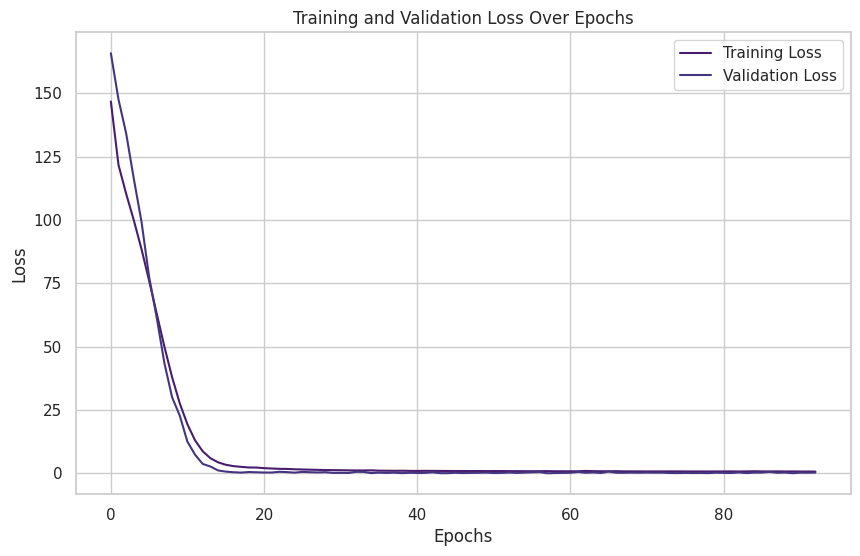

In [148]:
# Get the loss metrics from the training history
loss = history.history['loss']
val_loss = history.history['val_loss']

# Create a plot of training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

**Observaciones 💡 -->**

> - Lorem ipsum dolor sit amet, consectetur adipiscing elit. Nulla blandit dictum quam sit amet elementum. Vestibulum sed augue eu augue euismod ornare at lobortis nibh. Aenean hendrerit non dui a faucibus. In ut tincidunt orci. Nunc quis scelerisque diam. Orci varius natoque penatibus et magnis dis parturient.